# Vaksinasjonsdata Covid19

På FHIs nettsier https://statistikk.fhi.no/sysvak kan vi til enhver tid hente oppdaterte data på antall vaksinerte personer i Norge (første og andre dose). Tallene som vises her ble hentet 15. april 2021 klokka 08:05. Totalt antall personer (i ulike aldersgrupper) per 1. januar 2021 har vi hentet fra Statistisk Sentralbyrå https://www.ssb.no/befolkning/statistikker/folkemengde/aar-per-1-januar (Tabell 2).

## Læringsmål: Diskrete data

### Delmål
1. Hente data fra en nettside og sette opp et enkelt datasett
2. Regne ut gjennomsnitt og median
3. Plotte diskrete data i et histogram
4. Plotte diskrete data gruppevis

*Hva er relevant for tellende vurdering? Erfaringen med å håndtere datasett i Python får du nytte av i den tellende prosjektoppgaven, og i resten av utdanningen din. Du skal ikke skrive kode selv på eksamen, men du må kunne lese, tolke og forklare utskrift og plott fra ulike statistikk-beregninger i Python.*

### Utfordring!
Oppdater dataene på antall vaksinerte kvinner og menn ved å gå til https://statistikk.fhi.no/sysvak og finn dagens tall.

## Steg 1: Laste inn nødvendige python-pakker

Notebook-tips: Kjør koden som henter inn pakkene ved å trykke på feltet under og deretter knappen "Run" øverst på kommandolinja, eller bruk tastatursnarveien cmd + enter.

In [12]:
import pandas as pd # lese data fra excel-fil
import seaborn as sns # plotting
sns.set(style = 'whitegrid', font_scale = 1.5) # utseende av plott
import matplotlib.pyplot as plt # og mer plotting
import numpy as np # matematikk
import statistics as statistics  # statistikk-funksjoner

## Steg 2: Lage et datasett

In [6]:
antall_kvinner = 2671280 - 137359 - 151289 - 159684 # (over 15 år) per 1. januar 2021 (SSB)
antall_menn = 2718017 - 145601 - 159283 - 168370 # (over 15 år) per 1. januar 2021 (SSB)
dose1_kvinner = 581889 # per 15. april 2021 (FHI SYSVAK, du kan oppdatere selv!)
dose2_kvinner = 188971 # per 15. april 2021 (FHI SYSVAK, du kan oppdatere selv!)
dose1_menn = 379749 # per 15. april 2021 (FHI SYSVAK, du kan oppdatere selv!)
dose2_menn = 109886 # per 15. april 2021 (FHI SYSVAK, du kan oppdatere selv!)

dose0_kvinner = antall_kvinner - dose1_kvinner - dose2_kvinner
dose0_menn = antall_menn - dose1_menn - dose2_menn

vaksine = {'kvinner': [dose0_kvinner, dose1_kvinner, dose2_kvinner],
            'menn': [dose0_menn, dose1_menn, dose2_menn],
          'total': [dose0_kvinner + dose0_menn, 
                    dose1_kvinner + dose1_menn, 
                    dose2_kvinner + dose2_menn]}
vaksine

{'kvinner': [1452088, 581889, 188971],
 'menn': [1755128, 379749, 109886],
 'total': [3207216, 961638, 298857]}

In [7]:
# Legge dataene i en pandas DataFrame
df = pd.DataFrame(vaksine)
df

,kvinner,menn,total
0,1452088,1755128,3207216
1,581889,379749,961638
2,188971,109886,298857


## Steg 3: Regne ut gjennomsnitt og median

In [8]:
# Gjennomsnitt kan vi regne ut direkte fra tabellen
gjsnitt = (0*df.iloc[0,2] + 1*df.iloc[1,2] + 2*df.iloc[2,2])/(df.iloc[0,2]+df.iloc[1,2] + df.iloc[2,2])
gjsnitt

0.3490270521078915

In [9]:
# Median kan vi f.eks finne dersom vi lager oss en liste med vaksinedose for hver person
# (OBS: For april-dataene kan vi direkte lese av median = 0 fra tabellen)
vaksinedoser = [0]*df.iloc[0,2] + [1]*df.iloc[1,2] + [2]*df.iloc[2,2] # Legger sammen lister av 0, 1, og 2 vaksinedoser med lengder som spesifisert i tabell

statistics.median(vaksinedoser)

0

## Steg 4: Regne ut andeler og plotte histogram

In [10]:
# Regner vi ut andeler og lagrer i ny DataFrame
dfandel = df.div(df.sum(axis=0),axis=1)
dfandel['dose'] = [0,1,2]
dfandel

,kvinner,menn,total,dose
0,0.653226,0.781877,0.717866,0
1,0.261765,0.169171,0.215242,1
2,0.085009,0.048952,0.066893,2


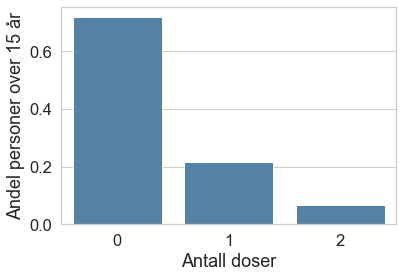

In [13]:
# Så plotter vi andeler personer mot antall vaksinedoser
sns.barplot(x = 'dose', y = 'total', data = dfandel, color = 'steelblue')
plt.ylabel("Andel personer over 15 år")
plt.xlabel("Antall doser")

## Steg 5: Plotte histogram for grupper

In [14]:
# For å enklest plotte grupperte data må vi endre 
# formen på datasettet med funksjonen 'melt'

dfandelkjønn = dfandel[['dose','menn','kvinner']].melt('dose', var_name = 'kjønn')
dfandelkjønn

,dose,kjønn,value
0,0,menn,0.781877
1,1,menn,0.169171
2,2,menn,0.048952
3,0,kvinner,0.653226
4,1,kvinner,0.261765
5,2,kvinner,0.085009


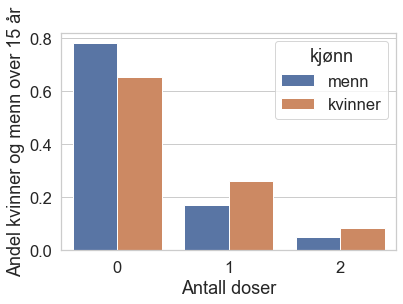

In [15]:
sns.barplot(x = 'dose', y = 'value', hue = 'kjønn', data = dfandelkjønn)
plt.ylabel("Andel kvinner og menn over 15 år")
plt.xlabel("Antall doser")